In [58]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialize the CNN
classifier = Sequential()

# Layer 1: Convolution + MaxPooling + BatchNormalization
classifier.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(BatchNormalization())

# Layer 2: Convolution + MaxPooling + BatchNormalization
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(BatchNormalization())

# Layer 3: Convolution + MaxPooling + BatchNormalization
classifier.add(Conv2D(256, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(BatchNormalization())

# Flatten
classifier.add(Flatten())
# Fully Connected Layers + Dropout
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.5))  # Dropout to reduce overfitting
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))

# Use a single output neuron with sigmoid activation
classifier.add(Dense(units=1, activation='sigmoid'))


# Compile the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\SoftLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

# Test Set Augmentation (Only Rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load Datasets
training_set = train_datagen.flow_from_directory(
    'Malaria Cells/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_set = test_datagen.flow_from_directory(
    'Malaria Cells/testing_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Class Weights for Imbalance
class_weights = {0: 1.0, 1: 1.5}  # Adjust based on class distribution


Found 27558 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.


In [8]:
# Check a batch of data from the training set
batch = next(iter(training_set))
print(f"Input Shape: {batch[0].shape}")
print(f"Label Shape: {batch[1].shape}")
print(f"First Batch Labels: {batch[1]}")


Input Shape: (32, 64, 64, 3)
Label Shape: (32,)
First Batch Labels: [1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1.]


### Early Stopping

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import LambdaCallback

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


def debug_batch(batch, logs):
    print(f"Batch Shape: {batch}")

debug_callback = LambdaCallback(on_batch_end=debug_batch)

# Add to the fit call
history = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=20,
    validation_data=test_set,
    validation_steps=len(test_set),
    callbacks=[early_stop, reduce_lr, debug_callback],
)



Epoch 1/20
Batch Shape: 0
  1/862 ━━━━━━━━━━━━━━━━━━━━ 38:23 3s/step - accuracy: 0.4375 - loss: 1.2718Batch Shape: 1
  2/862 ━━━━━━━━━━━━━━━━━━━━ 6:57 485ms/step - accuracy: 0.4844 - loss: 1.2625Batch Shape: 2
  3/862 ━━━━━━━━━━━━━━━━━━━━ 6:54 483ms/step - accuracy: 0.5104 - loss: 1.2557Batch Shape: 3
  4/862 ━━━━━━━━━━━━━━━━━━━━ 7:15 507ms/step - accuracy: 0.5273 - loss: 1.2551Batch Shape: 4
  5/862 ━━━━━━━━━━━━━━━━━━━━ 7:39 536ms/step - accuracy: 0.5381 - loss: 1.2728Batch Shape: 5
  6/862 ━━━━━━━━━━━━━━━━━━━━ 8:16 580ms/step - accuracy: 0.5474 - loss: 1.2985Batch Shape: 6
  7/862 ━━━━━━━━━━━━━━━━━━━━ 8:12 576ms/step - accuracy: 0.5521 - loss: 1.3317Batch Shape: 7
  8/862 ━━━━━━━━━━━━━━━━━━━━ 8:08 572ms/step - accuracy: 0.5544 - loss: 1.3544Batch Shape: 8
  9/862 ━━━━━━━━━━━━━━━━━━━━ 8:06 570ms/step - accuracy: 0.5553 - loss: 1.3741Batch Shape: 9
 10/862 ━━━━━━━━━━━━━━━━━━━━ 8:04 569ms/step - accuracy: 0.5566 - loss: 1.3948Batch Shape: 10
 11/862 ━━━━━━━━━━━━━━━━━━━━ 8:18 586ms/step 

### Evaluating the Model

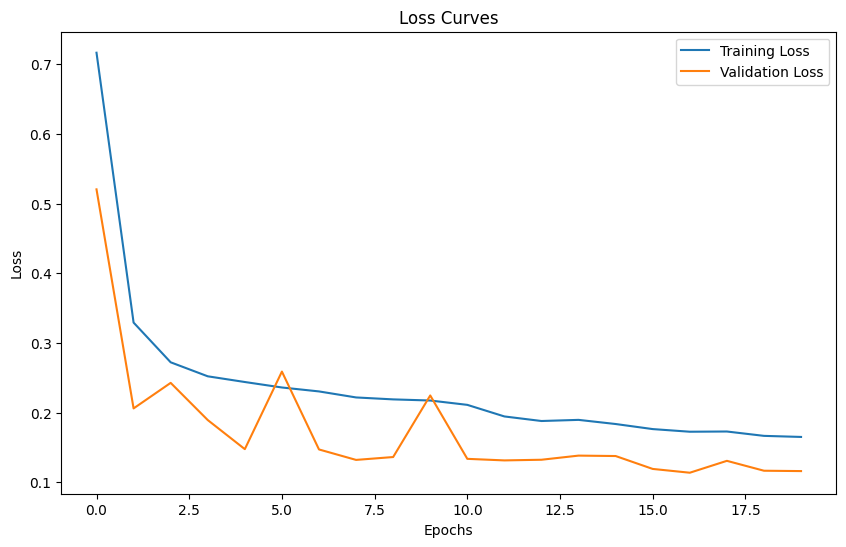

495/495 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.9594 - loss: 0.1092
Test Accuracy: 0.9583122730255127


In [11]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate on Test Set
test_loss, test_accuracy = classifier.evaluate(test_set, steps=len(test_set))
print(f"Test Accuracy: {test_accuracy}")


In [13]:
from tensorflow.keras.preprocessing import image

In [14]:
import numpy as np

test_image = image.load_img(r'Test_Images/Uninfected.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Uninfected'
else:
    prediction = 'Parasitised'
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


'Uninfected'

In [17]:
# Pretrained Models (Transfer Learning)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load Pretrained Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze Base Model Layers
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers on Top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the Model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the Model
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = transfer_model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=test_set,
    validation_steps=len(test_set),
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 753s 872ms/step - accuracy: 0.7821 - loss: 0.4586 - val_accuracy: 0.9018 - val_loss: 0.2496 - learning_rate: 0.0010
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 894s 1s/step - accuracy: 0.8569 - loss: 0.3423 - val_accuracy: 0.9097 - val_loss: 0.2365 - learning_rate: 0.0010
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 754s 875ms/step - accuracy: 0.8696 - loss: 0.3280 - val_accuracy: 0.9142 - val_loss: 0.2268 - learning_rate: 0.0010
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 714s 829ms/step - accuracy: 0.8757 - loss: 0.3138 - val_accuracy: 0.9139 - val_loss: 0.2253 - learning_rate: 0.0010
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 806s 935ms/step - accuracy: 0.8718 - loss: 0.3169 - val_accuracy: 0.9130 - val_loss: 0.2417 - learning_rate: 0.0010
Epoch 6/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 844s 979ms/step - accuracy: 0.8760 - loss: 0.3091 - val_accuracy: 0.9174 - val_loss: 0.2221 - learning_rate: 0.0010
Epoch 7/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 711s 825ms/step - accuracy:

495/495 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step


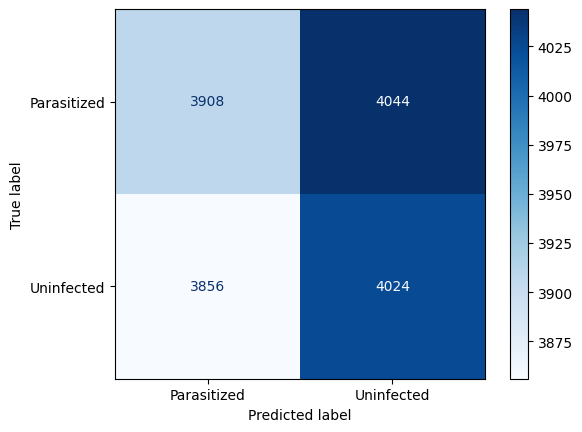

Classification Report:
              precision    recall  f1-score   support

 Parasitized       0.50      0.49      0.50      7952
  Uninfected       0.50      0.51      0.50      7880

    accuracy                           0.50     15832
   macro avg       0.50      0.50      0.50     15832
weighted avg       0.50      0.50      0.50     15832



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Confusion Matrix and Classification Report
test_set.reset()
predictions = (classifier.predict(test_set) > 0.5).astype('int32')
y_true = test_set.classes

cm = confusion_matrix(y_true, predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Parasitized', 'Uninfected'])
cmd.plot(cmap='Blues')
plt.show()


print("Classification Report:")
print(classification_report(y_true, predictions, target_names=['Parasitized', 'Uninfected']))

In [84]:


# Traditional ML Classifier (SVM) for Comparison
# Extract features using the CNN
feature_extractor = Sequential(classifier.layers[:-1])  # Remove final classification layer
features = feature_extractor.predict(training_set)
labels = training_set.classes

# Split into train/test for SVM
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='poly', probability=True)
svm.fit(X_train, y_train)

# Evaluate SVM
y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {svm_accuracy}")




862/862 ━━━━━━━━━━━━━━━━━━━━ 70s 81ms/step
SVM Accuracy: 0.49074746008708275


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


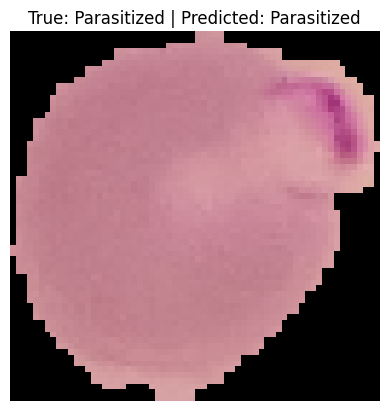

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


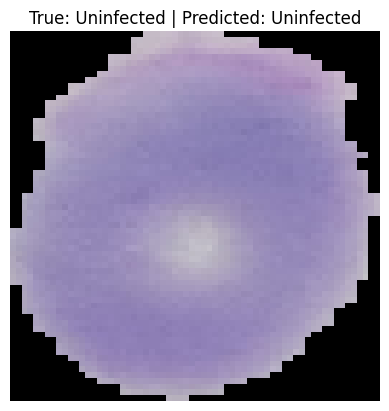

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


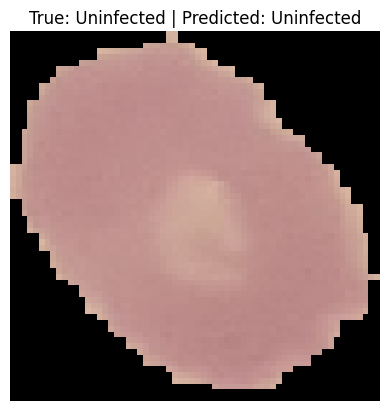

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


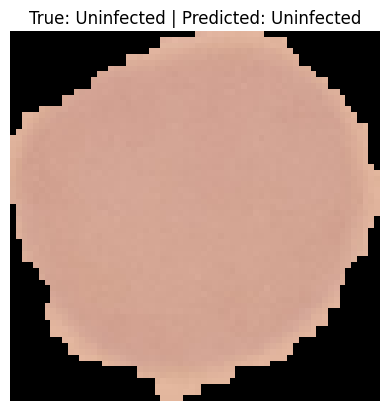

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


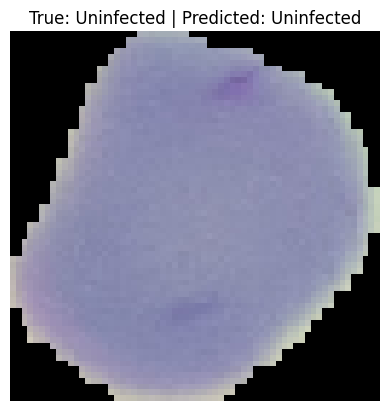

In [80]:
def visualize_predictions(generator, model, num_samples=5):
    generator.reset()  # Reset the generator to start from the first batch
    for i in range(num_samples):
        image, label = next(generator)  # Use next() to retrieve a batch
        prediction = (model.predict(image) > 0.5).astype('int32')
        
        plt.imshow(image[0])  # Display the first image in the batch
        true_label = 'Parasitized' if label[0] == 0 else 'Uninfected'
        predicted_label = 'Parasitized' if prediction[0][0] == 0 else 'Uninfected'
        
        plt.title(f"True: {true_label} | Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()


visualize_predictions(test_set, classifier)

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Extract Features from CNN
feature_extractor = Sequential(classifier.layers[:-1])  # Remove final classification layer
train_features = feature_extractor.predict(training_set)
test_features = feature_extractor.predict(test_set)

train_labels = training_set.classes
test_labels = test_set.classes

# Normalize Features
train_features = train_features / np.linalg.norm(train_features, axis=1, keepdims=True)
test_features = test_features / np.linalg.norm(test_features, axis=1, keepdims=True)

# Step 2: K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=2)  # k=5 as an example
knn.fit(train_features, train_labels)

knn_predictions = knn.predict(test_features)
knn_accuracy = accuracy_score(test_labels, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

print("KNN Classification Report:")
print(classification_report(test_labels, knn_predictions, target_names=['Parasitized', 'Uninfected']))

# Step 3: Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')
logistic_model.fit(train_features, train_labels)

logistic_predictions = logistic_model.predict(test_features)
logistic_accuracy = accuracy_score(test_labels, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

print("Logistic Regression Classification Report:")
print(classification_report(test_labels, logistic_predictions, target_names=['Parasitized', 'Uninfected']))


862/862 ━━━━━━━━━━━━━━━━━━━━ 97s 112ms/step
495/495 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step
KNN Accuracy: 0.502589691763517
KNN Classification Report:
              precision    recall  f1-score   support

 Parasitized       0.50      0.76      0.61      7952
  Uninfected       0.50      0.24      0.32      7880

    accuracy                           0.50     15832
   macro avg       0.50      0.50      0.47     15832
weighted avg       0.50      0.50      0.47     15832

Logistic Regression Accuracy: 0.506821627084386
Logistic Regression Classification Report:
              precision    recall  f1-score   support

 Parasitized       0.51      0.62      0.56      7952
  Uninfected       0.51      0.39      0.44      7880

    accuracy                           0.51     15832
   macro avg       0.51      0.51      0.50     15832
weighted avg       0.51      0.51      0.50     15832



In [21]:
classifier.save("CNN.keras")  # Saves the model as an HDF5 file
# classifier.save_weights("CNN.weights.keras")


transfer_model.save("VGG16.keras")  # Saves the model as an HDF5 file
# transfer_model.save_weights("VGG16.weights.keras")